In [6]:

import micropip
await micropip.install("urllib3 ")
await micropip.install("requests")

import sys
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import pchip_interpolate

from genetic_algorithm_pfm.genetic_algorithm_pfm.algorithm import GeneticAlgorithm

In [ ]:
w1 = .50 # Kosten
w2 = .50 # zicht

cost_knots = [800000000, 1200000000, 8000000000]
cost_pref = [100, 40, 0]
zicht_knots = [0, 5, 10]
zicht_pref = [0, 50, 100]

def compute_kosten(x1, x2):
    return x1 * (x2 ** 2 * 75000 + 150000 / 0.5) + (1600 - x1) * (x2**2 * 15000)


def compute_zichtlijn(x1, x2):
    raw_score = x1 / 1600 * 10 + (1600-x1)/1600 * 1 / x2
    return np.clip(raw_score, zicht_knots[0], zicht_knots[-1])


def objective_p1(x1, x2):
    """Preference for costs (lower is better)."""
    return pchip_interpolate(cost_knots, cost_pref, compute_kosten(x1, x2))


def objective_p2(x1, x2):
    """Preference for sightline quality (higher is better up to 10)."""
    return pchip_interpolate(zicht_knots, zicht_pref, compute_zichtlijn(x1, x2))


def objective(variables):
    """Wrap the preference functions for use in the GA."""
    x1 = variables[:, 1]
    x2 = variables[:, 2]

    p_1 = objective_p1(x1, x2)
    p_2 = objective_p2(x1, x2)

    return [w1, w2], [p_1, p_2]


In [8]:
def constraint_1(variables):
    """Constraint that at least 200 houses need to be built.

    :param variables: ndarray of n-by-m, with n the population size of the GA and m the number of variables.
    :return: list with scores of the constraint
    """
    x1 = variables[:, 0]
    x2 = variables[:, 1]


    return -(x1 + x2) - 1600 # < 0


def constraint_2(variables):
    """Constraint that no more than 260 can be built.

    :param variables: ndarray of n-by-m, with n the population size of the GA and m the number of variables.
    :return: list with scores of the constraint
    """
    x1 = variables[:, 0]
    x2 = variables[:, 1]


    return x1 + x2 - 10  # < 0



# define list with constraints
cons = [['ineq', constraint_1], ['ineq', constraint_2]]

# set bounds for all variables
b1 = [0, 260]  # x1
b2 = [0, 260]  # x2
b3 = [0, 260]  # x3
b4 = [0, 260]  # x4
bounds = [b1, b2, b3, b4]

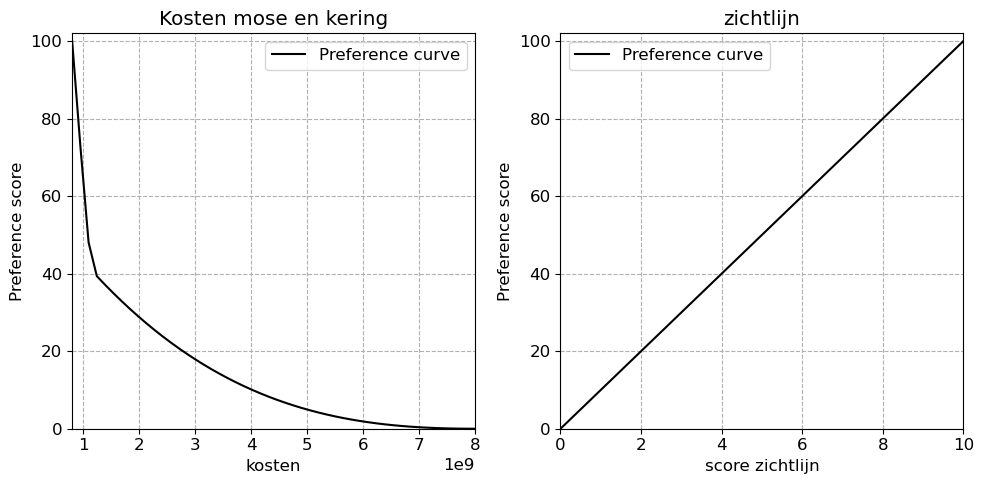

In [9]:
# create arrays for plotting continuous preference curves
c1 = np.linspace(800000000, 8000000000)
c2 = np.linspace(0, 10)

# calculate the preference functions
p1 = pchip_interpolate([800000000, 1200000000, 8000000000], [100, 40, 0], (c1))
p2 = pchip_interpolate([0,5,10], [0, 50, 100], (c2))

# create figure that plots all preference curves and the preference scores of the returned results of the GA
fig = plt.figure(figsize=((10,5)))

font1 = {'size':20}
font2 = {'size':15}

plt.rcParams['font.size'] = '12'
plt.rcParams['savefig.dpi'] = 300

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(c1, p1, label='Preference curve', color='black')

ax1.set_xlim((800000000, 8000000000))
ax1.set_ylim((0, 102))
ax1.set_title('Kosten mose en kering')
ax1.set_xlabel('kosten')
ax1.set_ylabel('Preference score')
ax1.grid()
ax1.grid(linestyle = '--')

#fig = plt.figure()
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(c2, p2, label='Preference curve', color='black')
ax2.set_xlim((0, 10))
ax2.set_ylim((0, 102))
ax2.set_title('zichtlijn')
ax2.set_xlabel('score zichtlijn')
ax2.set_ylabel('Preference score')
ax2.grid()
ax2.legend()
ax2.grid(linestyle = '--')

ax1.legend()
ax2.legend()
fig.tight_layout()

#Two  lines to make our compiler able to draw:
#fig.savefig("/home/ruud/engineeringdesign.education/static/urbanplanningproblemfunctions.png")

Run GA with minmax
The type of aggregation is set to minmax
Generation   Best score   Mean             Max stall    Diversity    Number of non-feasible results
0            2.1657       42.6311          0            0.007        0           
1            0.1776       14.3465          0            0.137        0           
2            0.1764       8.55             0            0.419        0           
3            0.1758       5.1659           0            0.453        0           
4            0.1758       4.3647           1            0.452        0           
5            0.1758       3.5993           2            0.455        0           
6            0.1758       3.0963           3            0.46         0           
7            0.1758       3.08             4            0.452        0           
8            0.1758       3.1187           5            0.447        0           
9            0.1758       3.5417           6            0.46         0           
10           0.1758 

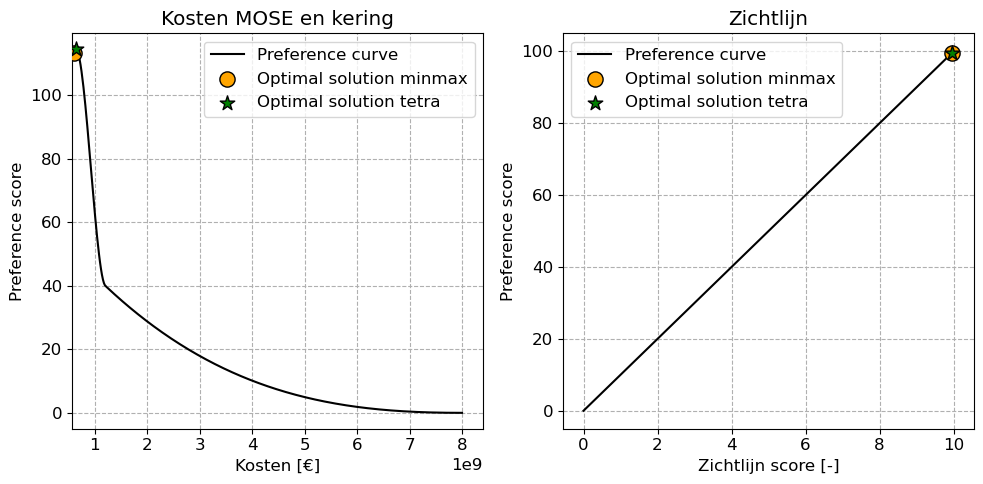

In [10]:
# Optimize MOSE cost and sightline with GA based on the urban planning example
paradigm = ['minmax', 'tetra']
marker = ['o', '*']
colours = ['orange', 'green']

# Ensure supporting data/functions exist when the cell runs standalone
if 'cost_knots' not in globals():
    cost_knots = [800000000, 1200000000, 8000000000]
if 'cost_pref' not in globals():
    cost_pref = [100, 40, 0]
if 'zicht_knots' not in globals():
    zicht_knots = [0, 5, 10]
if 'zicht_pref' not in globals():
    zicht_pref = [0, 50, 100]
if 'compute_kosten' not in globals():
    def compute_kosten(x1, x2):
        return x1 * (3**2 * 75000 + 150000 / x2) + (1600 - x1) * (3**2 * 15000)
if 'compute_zichtlijn' not in globals():
    def compute_zichtlijn(x1, x2):
        raw_score = x1 / 1600 * 10 + 10 / x2
        return np.clip(raw_score, zicht_knots[0], zicht_knots[-1])
if 'objective_p1' not in globals():
    def objective_p1(x1, x2):
        return pchip_interpolate(cost_knots, cost_pref, compute_kosten(x1, x2))
if 'objective_p2' not in globals():
    def objective_p2(x1, x2):
        return pchip_interpolate(zicht_knots, zicht_pref, compute_zichtlijn(x1, x2))

# Wrap the MOSE preference functions so the GA receives the right format
def objective_mose(variables):
    x1 = variables[:, 0]
    x2 = variables[:, 1]
    p_1 = objective_p1(x1, x2)
    p_2 = objective_p2(x1, x2)
    return [w1, w2], [p_1, p_2]

# Two decision variables: MOSE length [m] and barrier height [m]
mose_bounds = [[0.0, 1600.0], [1.0, 10.0]]
cons_mose = []

results = []

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

for i, aggregation in enumerate(paradigm):
    options = {
        'n_bits': 8,
        'n_iter': 400,
        'n_pop': 500,
        'r_cross': 0.8,
        'max_stall': 8,
        'aggregation': aggregation,
        'var_type': 'real'
    }

    print(f'Run GA with {aggregation}')
    ga = GeneticAlgorithm(objective=objective_mose, constraints=cons_mose, bounds=mose_bounds, options=options)
    score_IMAP, design_variables_IMAP, _ = ga.run()

    x1_opt, x2_opt = design_variables_IMAP
    kosten_opt = compute_kosten(x1_opt, x2_opt)
    zicht_opt = compute_zichtlijn(x1_opt, x2_opt)

    p1_res = float(pchip_interpolate(cost_knots, cost_pref, kosten_opt))
    p2_res = float(pchip_interpolate(zicht_knots, zicht_pref, zicht_opt))

    results.append({
        'aggregation': aggregation,
        'index': i,
        'kosten': kosten_opt,
        'zicht': zicht_opt,
        'p1': p1_res,
        'p2': p2_res
    })

    print(f'Optimal result for MOSE length = {x1_opt:.2f} m and barrier height = {x2_opt:.2f} m')
    print(f'Kosten: {kosten_opt:,.0f} €')
    print(f'Zichtlijn score: {zicht_opt:.2f}')
    print(f'p1_res: {p1_res:.2f}, p2_res: {p2_res:.2f}')

# Determine the plotting range so both the preference curves and the GA results are shown on the same line
all_cost_samples = cost_knots + [res['kosten'] for res in results]
all_zicht_samples = list(zicht_knots) + [res['zicht'] for res in results]

kosten_range = np.linspace(min(all_cost_samples), max(all_cost_samples), 400)
zicht_range = np.linspace(min(all_zicht_samples), max(all_zicht_samples), 400)

pref_cost = pchip_interpolate(cost_knots, cost_pref, kosten_range)
pref_zicht = pchip_interpolate(zicht_knots, zicht_pref, zicht_range)

ax1.plot(kosten_range, pref_cost, label='Preference curve', color='black')
ax1.set_title('Kosten MOSE en kering')
ax1.set_xlabel('Kosten [€]')
ax1.set_ylabel('Preference score')
ax1.grid(linestyle='--')

ax2.plot(zicht_range, pref_zicht, label='Preference curve', color='black')
ax2.set_title('Zichtlijn')
ax2.set_xlabel('Zichtlijn score [-]')
ax2.set_ylabel('Preference score')
ax2.grid(linestyle='--')

for res in results:
    idx = res['index']
    label = f"Optimal solution {res['aggregation']}"
    ax1.scatter(res['kosten'], res['p1'], label=label, color=colours[idx], marker=marker[idx],
                s=120, edgecolor='black', zorder=5)
    ax2.scatter(res['zicht'], res['p2'], label=label, color=colours[idx], marker=marker[idx],
                s=120, edgecolor='black', zorder=5)

ax1.set_xlim((min(all_cost_samples) * 0.95, max(all_cost_samples) * 1.05))
ax1.set_ylim((min(pref_cost.min(), *(res['p1'] for res in results)) - 5,
              max(pref_cost.max(), *(res['p1'] for res in results)) + 5))

padding_zicht = max(0.5, 0.05 * (max(all_zicht_samples) - min(all_zicht_samples) + 1))
ax2.set_xlim((min(all_zicht_samples) - padding_zicht, max(all_zicht_samples) + padding_zicht))
ax2.set_ylim((min(pref_zicht.min(), *(res['p2'] for res in results)) - 5,
              max(pref_zicht.max(), *(res['p2'] for res in results)) + 5))

ax1.legend()
ax2.legend()
fig.tight_layout()
plt.show()
